In [1]:
#importing the necessary libraries to help import the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#import the data set
sales=pd.read_csv("Advertising.csv")

In [3]:
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#check for the shape
sales.shape

(200, 5)

In [5]:
#check for information about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#check for missing and null values
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
#check for columns header
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

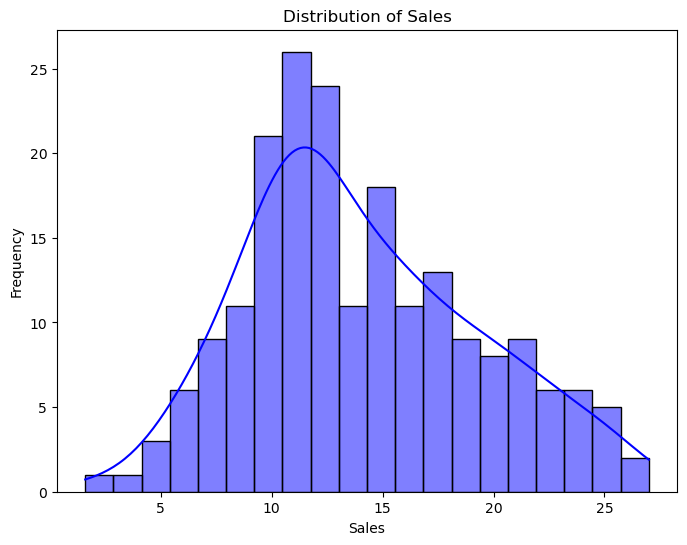

In [8]:
#Perform exploratory data analysis (EDA)
#Sales Distribution: This plot shows how sales are distributed, helping us understand the range and central tendency.
# Visualization 1: Sales distribution
plt.figure(figsize=(8, 6))
sn.histplot(sales['Sales'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

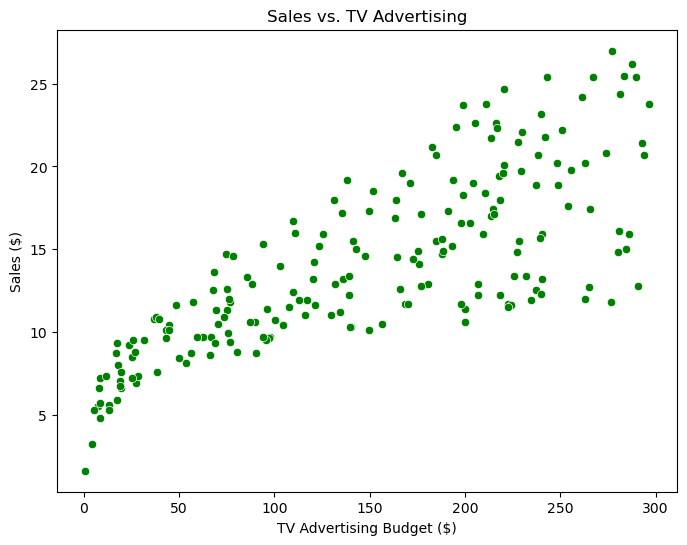

In [9]:
# Visualization 2: Relationship between TV advertising and Sales
#A scatter plot reveals the relationship between TV advertising spend and sales, indicating whether higher spend correlates with higher sales
plt.figure(figsize=(8, 6))
sn.scatterplot(data=sales, x='TV', y='Sales', color='green')
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

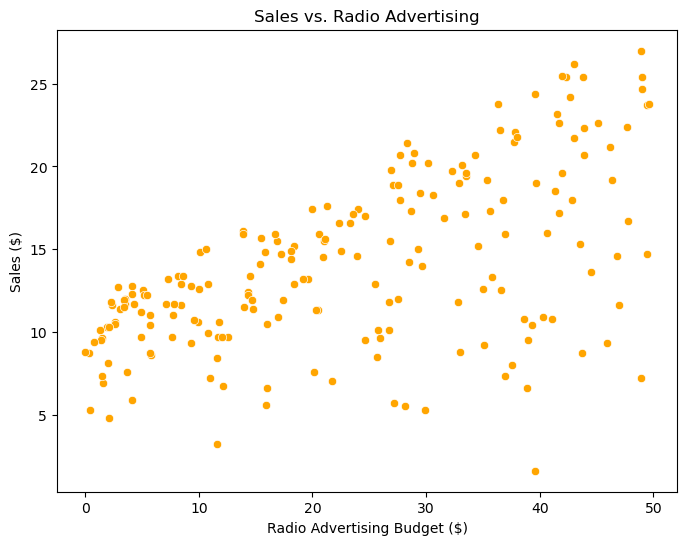

In [10]:
# Visualization 3: Relationship between Radio advertising and Sales
#Similar to the TV plot, this examines how radio advertising impacts sales.
plt.figure(figsize=(8, 6))
sn.scatterplot(data=sales, x='Radio', y='Sales', color='orange')
plt.title('Sales vs. Radio Advertising')
plt.xlabel('Radio Advertising Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

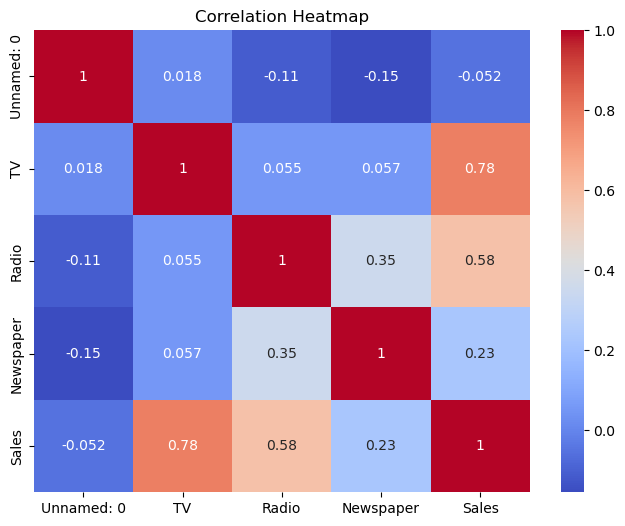

In [11]:
# Visualization 4: Heatmap of correlations
#This shows the correlation between variables, helping identify which features strongly influence sales.
plt.figure(figsize=(8, 6))
correlation = sales.corr()
sn.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Split the Data
#To train and test the sales prediction model, i will need to divide the dataset into training and testing sets.
#first import the necessary library
from sklearn.model_selection import train_test_split

In [13]:
#Identify the features (independent variables) and the target variable (dependent variable)
# Features(independent variable)
X = sales[['Unnamed: 0','TV', 'Radio', 'Newspaper']]  
#target(dependent variable)
y = sales['Sales']

In [14]:
# Split the data into training and testing sets 20% testing 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Print the shape of the splits to confirm
print("Shape of training data:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nShape of testing data:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of training data:
X_train: (160, 4), y_train: (160,)

Shape of testing data:
X_test: (40, 4), y_test: (40,)


In [16]:
#Train a Machine Learning Model
# train a simple linear regression model using the training data.
#Linear regression is a good starting point for predicting sales based on advertising spend
from sklearn.linear_model import LinearRegression

In [17]:
# Initialize the model
model = LinearRegression()
#Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = {
    "coefficients": {
        "TV": model.coef_[0],
        "Radio": model.coef_[1],
        "Newspaper": model.coef_[2],
        "Unnamed: 0":model.coef_[3]
    },
    "intercept": model.intercept_
}

In [19]:
pred

{'coefficients': {'TV': 0.0006435900404990063,
  'Radio': 0.04471835153028315,
  'Newspaper': 0.18925118428501725,
  'Unnamed: 0': 0.0030457661251665612},
 'intercept': 2.9065270863618}

In [20]:
#For every $1 spent on TV, sales increase by 0.00064 units.
#For every $1 spent on Radio, sales increase by 0.0447 units.
#For every $1 spent on Newspaper, sales increase by 0.18925 units.
#For every $1 spent on unnamed ;0, sales increase by 0.00304 units
#When no money is spent on advertising, predicted sales are 2.906 units.


In [21]:
#Evaluate the Model
#i will use standard regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score to assess the model.
#import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
# Store the evaluation metrics in a dictionary
evaluation = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

In [25]:
evaluation

{'Mean Absolute Error (MAE)': 1.4650601050102927,
 'Mean Squared Error (MSE)': 3.1990044685889023,
 'R^2 Score': 0.8986489151417081}

In [26]:
#MAE: On average, the model's predictions are off by 1.46 units of sales.
#MSE and RMSE: Errors are relatively small, indicating good predictions.
#R² Score: The model explains 89.9% of the variance in sales, which is excellent

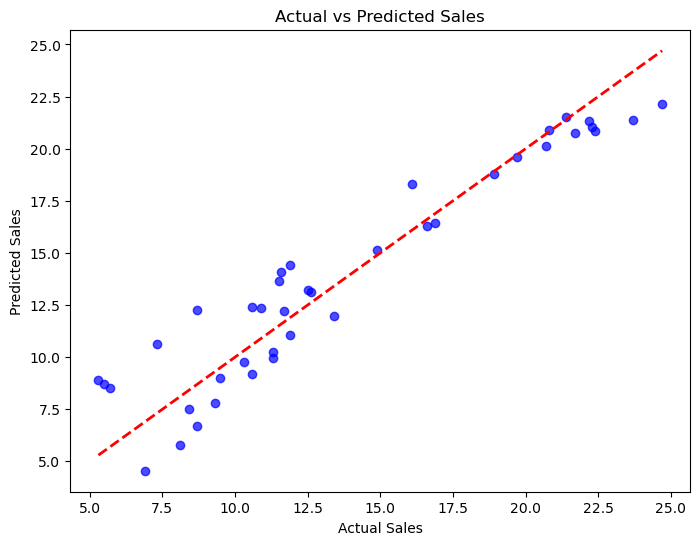

In [29]:
# Scatter plot: Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
#Points close to this line indicate good predictions.